In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
x_train_ori = pd.read_csv("../../data/x_train_ori.csv")
x_train_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
0,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,4.664106,7.624124,5.332859,1.0,0.000000,0.000000,74.350000,0.000000,0.000000,0.000000
1,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,5.461010,7.291025,6.276063,1.0,0.333333,0.250000,74.516667,0.083333,0.000000,0.000000
2,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,2.895693,7.346198,5.545476,1.0,2.562500,0.000000,68.131250,0.187500,0.000000,0.000000
3,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,2.852481,6.922563,5.658661,1.0,1.994298,0.497505,75.368140,0.006415,0.012830,0.001426
4,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,3.136439,6.981401,5.751723,1.0,1.576271,0.000000,73.357627,0.067797,0.050847,0.000000


In [ ]:
y_train_ori = pd.read_csv("../../data/y_train_ori.csv")
y_train_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [ ]:
x_valid_ori = pd.read_csv("../../data/x_valid_ori.csv")
x_valid_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
0,4.748306,0.859462,0.451852,0.192593,11.911111,11.866667,0.340741,0.607407,0.348148,0.133333,...,2.853985,7.008135,5.556642,1.0,1.762963,0.725926,74.104444,0.096296,0.014815,0.014815
1,4.004128,0.375905,0.416667,0.333333,12.000000,12.000000,0.583333,0.833333,0.333333,0.416667,...,0.000000,5.986927,5.640768,1.0,0.000000,0.000000,72.233333,0.000000,0.333333,0.000000
2,4.091386,0.132163,0.333333,0.095238,12.000000,11.809524,0.396825,0.492063,0.206349,0.142857,...,1.771407,6.182875,5.099548,1.0,0.984127,0.000000,71.195238,0.365079,0.015873,0.000000
3,9.068188,6.974479,0.714286,0.142857,12.000000,10.285714,0.571429,0.714286,0.428571,0.000000,...,9.268732,5.126291,3.962215,1.0,3.857143,3.857143,75.985714,0.142857,0.000000,0.000000
4,4.293143,0.297367,0.357143,0.178571,12.000000,12.000000,0.464286,0.642857,0.357143,0.142857,...,2.776824,7.217971,6.102226,1.0,1.071429,0.000000,75.339286,0.142857,0.000000,0.000000


In [ ]:
y_valid_ori = pd.read_csv("../../data/y_valid_ori.csv")
y_valid_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
x_test_ori = pd.read_csv("../../data/x_test_ori.csv")
x_test_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
0,4.362341,0.219979,0.398876,0.202247,11.865169,11.932584,0.455056,0.584270,0.421348,0.162921,...,2.644674,6.936216,5.823721,1.0,1.213483,0.044944,76.405056,0.089888,0.056180,0.028090
1,4.381183,0.223859,0.428928,0.174564,11.885287,11.785536,0.431421,0.623441,0.428928,0.164589,...,2.869878,6.862755,5.505056,1.0,1.139651,0.000000,74.188030,0.159601,0.034913,0.017456
2,4.787714,0.514027,0.437500,0.187500,12.000000,12.000000,0.312500,0.625000,0.500000,0.125000,...,1.861971,7.140210,5.718653,1.0,0.687500,0.000000,77.512500,0.000000,0.062500,0.125000
3,4.532393,0.170251,0.373214,0.232143,11.850000,11.921429,0.310714,0.612500,0.414286,0.141071,...,2.243119,7.172417,5.957562,1.0,2.007143,0.000000,71.858571,0.103571,0.005357,0.000000
4,4.166548,0.135214,0.476923,0.184615,12.000000,12.000000,0.215385,0.584615,0.307692,0.153846,...,2.070178,6.830354,5.633410,1.0,1.430769,0.000000,75.035385,0.046154,0.092308,0.015385


In [ ]:
y_test_ori = pd.read_csv("../../data/y_test_ori.csv")
y_test_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
X_train = pd.concat([x_train_ori, x_valid_ori])
y_train = pd.concat([y_train_ori, y_valid_ori])
print(X_train.shape)

(4869, 27)


In [ ]:
X_test, y_test = x_test_ori, y_test_ori

# Model : using all features

### Model 1 : LR

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True, scoring = "f1")
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("f1 :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.0


In [ ]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.9001848428835489


In [ ]:
def get_threshould_fpr_tpr(y, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    return fpr, tpr, thresholds

def draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr):
    plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

#determining best threshold
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#pridicting Yq for given Xq with best threshold:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def get_confusion_matrix(y, y_pred,axis, best_t):
    cm = pd.DataFrame(confusion_matrix(y, predict_with_best_t(y_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'],ax=axis)

In [ ]:
def model_performence_check(model,X_train,X_test,y_train,y_test):
    
    y_train_pred = model.predict_proba(X_train)[:,1]    
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = get_threshould_fpr_tpr(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = get_threshould_fpr_tpr(y_test, y_test_pred)
    
    #plot Roc_AUC_curve
    draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    #draw confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 

    #training confusion matrix heatmap
    get_confusion_matrix(y_train, y_train_pred,ax[0], best_t)
    ax[0].set_title("confusion matrix for traning data")

    #test confusion matrix heatmap
    get_confusion_matrix(y_test, y_test_pred,ax[1], best_t)
    ax[1].set_title("confusion matrix for test data")
    
    actual_output = y_test
    pred_output = predict_with_best_t(y_test_pred, best_t)
    
    model_accuracy_score = metrics.accuracy_score(actual_output,pred_output)
    print("Model test Accuracy score is : ",model_accuracy_score)
    
    model_recall_score = metrics.recall_score(actual_output,pred_output)
    print("Model test Recall score is : ",model_recall_score)
    
    model_precision_score = metrics.precision_score(actual_output,pred_output)
    print("Model test Precision score is : ",model_precision_score)
    
    model_f1_score = metrics.f1_score(actual_output,pred_output)
    print("Model test F1 score is : ",model_f1_score)
    
    model_AUC_score = metrics.auc(test_fpr, test_tpr)
    print("Model test AUC score is : ",model_AUC_score)
    
    return (model_f1_score, model_AUC_score)

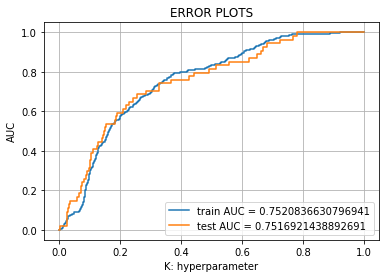

the maximum value of tpr*(1-fpr) 0.49887852845302044 for threshold 0.078
Model test Accuracy score is :  0.6950092421441775
Model test Recall score is :  0.7037037037037037
Model test Precision score is :  0.20320855614973263
Model test F1 score is :  0.31535269709543573
Model test AUC score is :  0.7516921438892691


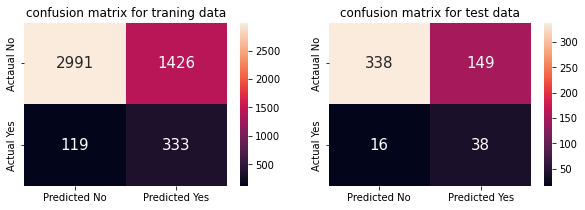

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train,X_test,y_train,y_test)

### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("f1 :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'min_samples_split': 5}
roc_auc : 0.44616709064827403


In [ ]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 10, min_samples_split = 5)
DT_model2=DT_model2.fit(X_train,y_train)

print("score",DT_model2.score(X_test,y_test))

score 0.833641404805915


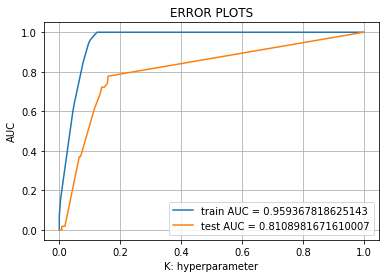

the maximum value of tpr*(1-fpr) 0.8759338917817523 for threshold 0.62
Model test Accuracy score is :  0.833641404805915
Model test Recall score is :  0.7777777777777778
Model test Precision score is :  0.35
Model test F1 score is :  0.48275862068965514
Model test AUC score is :  0.8108981671610007


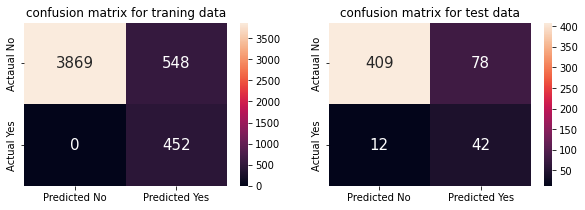

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train,X_test,y_train,y_test)

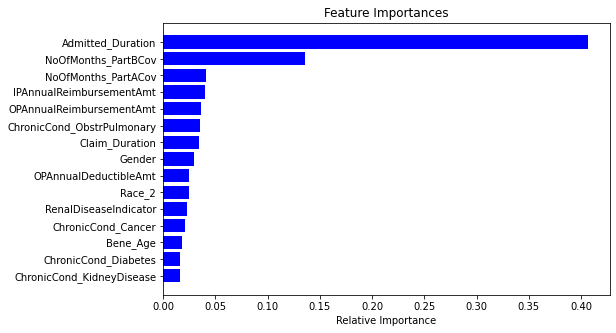

In [ ]:
features = X_train.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("f1 :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
roc_auc : 0.5068379149110013


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 300,max_features='auto',max_depth=8,criterion='gini',
                             class_weight = 'balanced',n_jobs=-1,verbose=10, random_state=42)

RF2=RF2.fit(X_train,y_train)

print("score",RF2.score(X_test,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300building tree 3 of 300

building tree 4 of 300

building tree 5 of 300building tree 6 of 300

building tree 7 of 300building tree 8 of 300

building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s


building tree 16 of 300building tree 17 of 300building tree 18 of 300


building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300building tree 30 of 300

building tree 31 of 300building tree 32 of 300

building tree 33 of 300


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s


building tree 34 of 300building tree 35 of 300
building tree 36 of 300

building tree 37 of 300
building tree 38 of 300building tree 39 of 300

building tree 40 of 300
building tree 41 of 300building tree 42 of 300building tree 43 of 300
building tree 44 of 300


building tree 45 of 300
building tree 46 of 300building tree 47 of 300

building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300building tree 57 of 300

building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75

[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.4s


building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.7s


building tree 92 of 300
building tree 93 of 300building tree 94 of 300

building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    3.1s


building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300building tree 113 of 300

building tree 114 of 300
building tree 115 of 300building tree 116 of 300

building tree 117 of 300building tree 118 of 300

building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.5s


building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300


[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    3.8s


building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.1s


building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300


[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    4.3s


building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300

[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.6s



building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    4.9s


building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300building tree 225 of 300

building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300building tree 232 of 300

building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300building tree 240 of 300

building tree 241 of 300
building tree 242 of 300building tree 243 of 300



[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    5.4s


building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300


[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    5.8s


building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300building tree 268 of 300building tree 269 of 300


building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300building tree 283 of 300

building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    6.0s


building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    

score 0.8706099815157117


[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.6s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Para

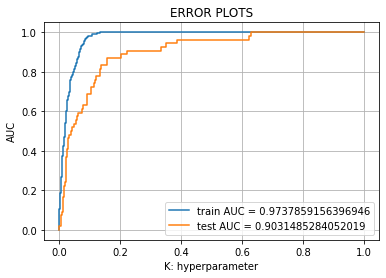

the maximum value of tpr*(1-fpr) 0.8888966803640801 for threshold 0.523
Model test Accuracy score is :  0.878003696857671
Model test Recall score is :  0.7222222222222222
Model test Precision score is :  0.43333333333333335
Model test F1 score is :  0.5416666666666666
Model test AUC score is :  0.9031485284052019


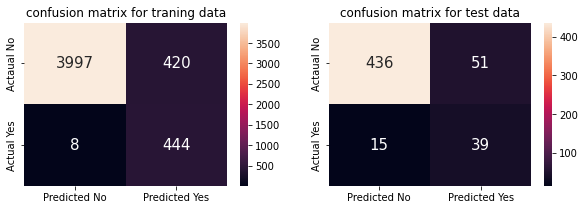

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train,X_test,y_train,y_test)

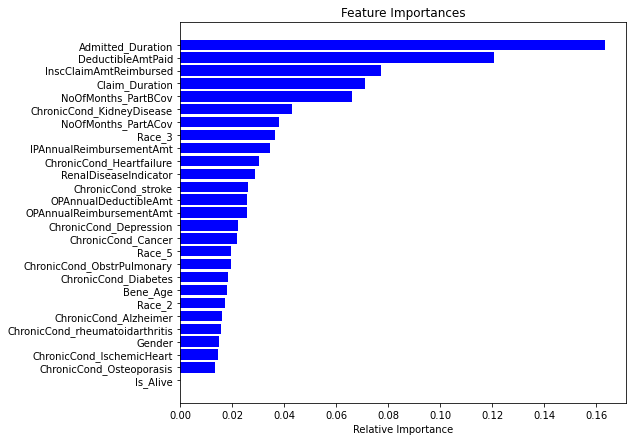

In [ ]:
features = X_train.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 4: Xg_Boost

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100], "scale_pos_weight": [0.2,1,2,5,10]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='f1', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("f1 :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'scale_pos_weight': 5, 'n_estimators': 50, 'eta': 0.2}
roc_auc : 0.49816521136002284


In [ ]:
XGB2 = xgb.XGBClassifier(eta=0.2,n_estimators=50,n_jobs=-1,scale_pos_weight=5)

XGB2=XGB2.fit(X_train,y_train)

print("score",XGB2.score(X_test,y_test))

score 0.9038817005545287


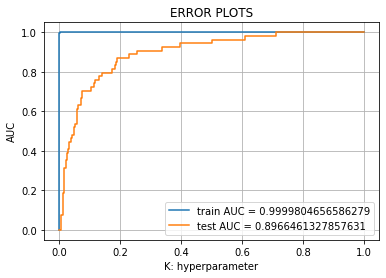

the maximum value of tpr*(1-fpr) 0.9988680099615124 for threshold 0.733
Model test Accuracy score is :  0.9131238447319778
Model test Recall score is :  0.35185185185185186
Model test Precision score is :  0.6129032258064516
Model test F1 score is :  0.44705882352941173
Model test AUC score is :  0.8966461327857631


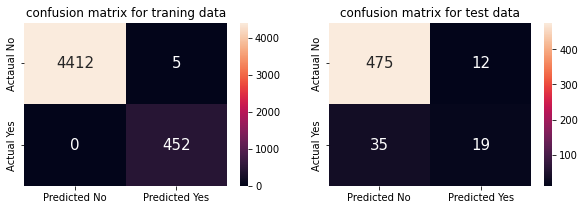

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train,X_test,y_train,y_test)

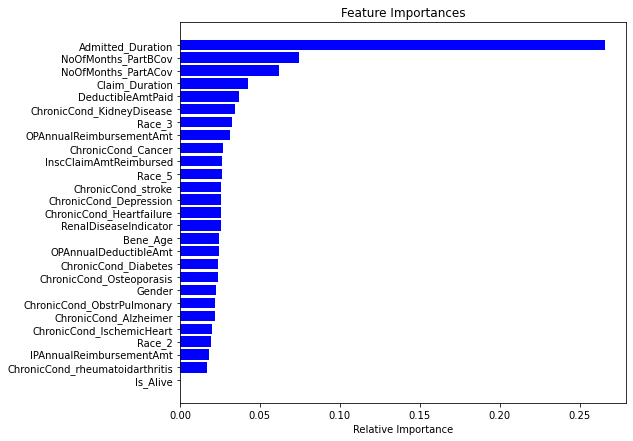

In [ ]:
features = X_train.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model : using Important features

In [ ]:
Important_col = [features[i] for i in indices]

print(len(Important_col))

27


In [ ]:
X_train1 = X_train[Important_col]
X_train1.head(5)

,Is_Alive,ChronicCond_rheumatoidarthritis,IPAnnualReimbursementAmt,Race_2,ChronicCond_IschemicHeart,ChronicCond_Alzheimer,ChronicCond_ObstrPulmonary,Gender,ChronicCond_Osteoporasis,ChronicCond_Diabetes,...,InscClaimAmtReimbursed,ChronicCond_Cancer,OPAnnualReimbursementAmt,Race_3,ChronicCond_KidneyDisease,DeductibleAmtPaid,Claim_Duration,NoOfMonths_PartACov,NoOfMonths_PartBCov,Admitted_Duration
0,1.0,0.000000,4.664106,0.000000,1.000000,1.000000,0.500000,0.000000,0.500000,1.000000,...,5.525612,0.000000,7.624124,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,0.000000
1,1.0,0.416667,5.461010,0.083333,0.750000,0.666667,0.416667,0.333333,0.250000,0.416667,...,3.961804,0.083333,7.291025,0.000000,0.333333,1.162413,0.333333,12.000000,12.000000,0.250000
2,1.0,0.312500,2.895693,0.187500,0.937500,0.437500,0.500000,0.375000,0.375000,0.875000,...,4.662761,0.125000,7.346198,0.000000,0.562500,0.000000,2.562500,12.000000,12.000000,0.000000
3,1.0,0.348539,2.852481,0.006415,0.749822,0.429081,0.345688,0.391304,0.296507,0.698503,...,4.780181,0.160371,6.922563,0.012830,0.440485,0.709673,1.994298,11.940128,11.935139,0.497505
4,1.0,0.237288,3.136439,0.067797,0.711864,0.389831,0.322034,0.440678,0.322034,0.677966,...,4.112503,0.152542,6.981401,0.050847,0.491525,0.214173,1.576271,11.796610,11.966102,0.000000


In [ ]:
X_test1 = X_test[Important_col]
X_test1.head(5)

,Is_Alive,ChronicCond_rheumatoidarthritis,IPAnnualReimbursementAmt,Race_2,ChronicCond_IschemicHeart,ChronicCond_Alzheimer,ChronicCond_ObstrPulmonary,Gender,ChronicCond_Osteoporasis,ChronicCond_Diabetes,...,InscClaimAmtReimbursed,ChronicCond_Cancer,OPAnnualReimbursementAmt,Race_3,ChronicCond_KidneyDisease,DeductibleAmtPaid,Claim_Duration,NoOfMonths_PartACov,NoOfMonths_PartBCov,Admitted_Duration
0,1.0,0.297753,2.644674,0.089888,0.752809,0.455056,0.241573,0.398876,0.325843,0.730337,...,4.362341,0.162921,6.936216,0.056180,0.421348,0.219979,1.213483,11.865169,11.932584,0.044944
1,1.0,0.301746,2.869878,0.159601,0.793017,0.431421,0.319202,0.428928,0.331671,0.683292,...,4.381183,0.164589,6.862755,0.034913,0.428928,0.223859,1.139651,11.885287,11.785536,0.000000
2,1.0,0.500000,1.861971,0.000000,0.812500,0.312500,0.312500,0.437500,0.187500,0.687500,...,4.787714,0.125000,7.140210,0.062500,0.500000,0.514027,0.687500,12.000000,12.000000,0.000000
3,1.0,0.298214,2.243119,0.103571,0.735714,0.310714,0.366071,0.373214,0.285714,0.719643,...,4.532393,0.141071,7.172417,0.005357,0.414286,0.170251,2.007143,11.850000,11.921429,0.000000
4,1.0,0.369231,2.070178,0.046154,0.753846,0.215385,0.338462,0.476923,0.323077,0.676923,...,4.166548,0.153846,6.830354,0.092308,0.307692,0.135214,1.430769,12.000000,12.000000,0.000000


### Model 1: LR

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True, scoring = "f1")
logreg_cv.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.0


In [ ]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X_train1,y_train)
print("score",logreg2.score(X_test1,y_test))

score 0.9001848428835489


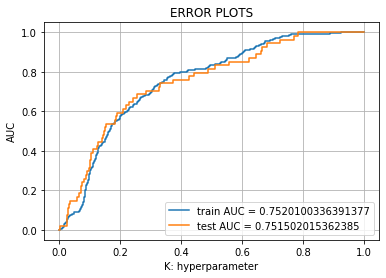

the maximum value of tpr*(1-fpr) 0.4986165679264147 for threshold 0.079
Model test Accuracy score is :  0.7042513863216266
Model test Recall score is :  0.7037037037037037
Model test Precision score is :  0.2087912087912088
Model test F1 score is :  0.3220338983050847
Model test AUC score is :  0.751502015362385


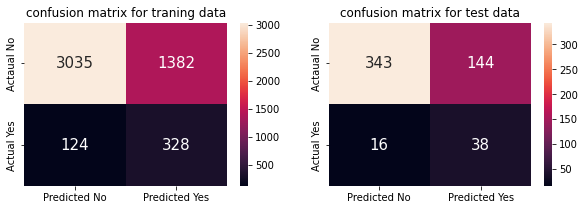

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train1,X_test1,y_train,y_test)

### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("f1 :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'min_samples_split': 5}
roc_auc : 0.45098068606676256


In [ ]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 10, min_samples_split = 5)
DT_model2=DT_model2.fit(X_train1,y_train)

print("score",DT_model2.score(X_test1,y_test))

score 0.8428835489833642


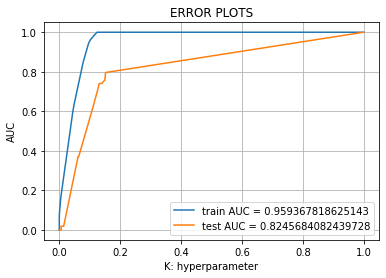

the maximum value of tpr*(1-fpr) 0.8759338917817523 for threshold 0.62
Model test Accuracy score is :  0.8428835489833642
Model test Recall score is :  0.7962962962962963
Model test Precision score is :  0.36752136752136755
Model test F1 score is :  0.5029239766081871
Model test AUC score is :  0.8245684082439728


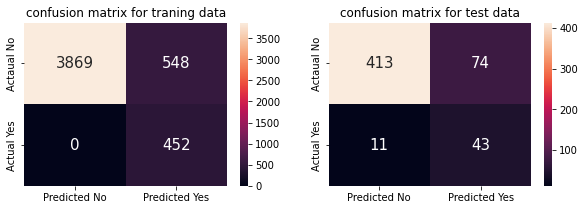

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train1,X_test1,y_train,y_test)

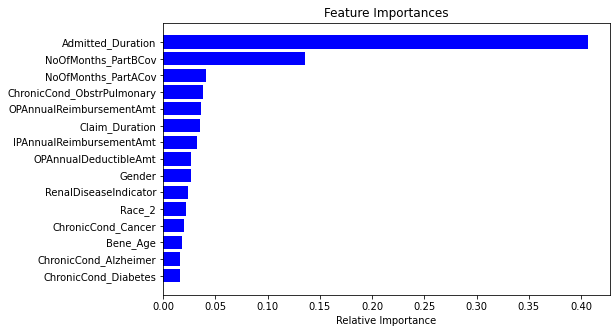

In [ ]:
features = X_train1.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train1, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("f1 :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 300}
roc_auc : 0.5046810760679831


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 300,max_features='log2',max_depth=8,criterion='entropy',
                             class_weight = 'balanced',n_jobs=-1,verbose=1, random_state=42)

RF2=RF2.fit(X_train1,y_train)

print("score",RF2.score(X_test1,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.8s


score 0.8632162661737524


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


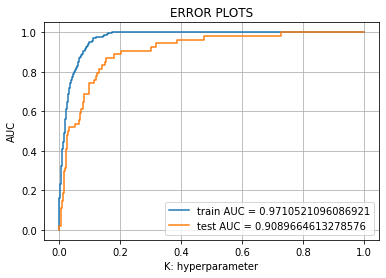

the maximum value of tpr*(1-fpr) 0.8617469511401042 for threshold 0.52
Model test Accuracy score is :  0.8706099815157117
Model test Recall score is :  0.7592592592592593
Model test Precision score is :  0.41836734693877553
Model test F1 score is :  0.5394736842105263
Model test AUC score is :  0.9089664613278576


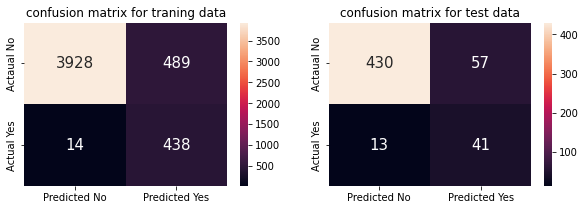

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train1,X_test1,y_train,y_test)

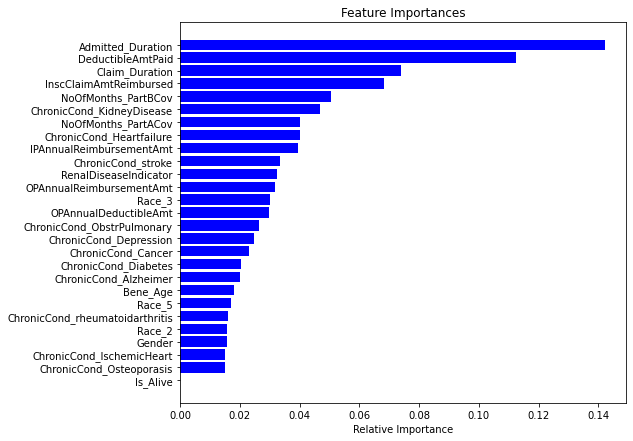

In [ ]:
features = X_train1.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 4: XG_Boost

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100], "scale_pos_weight": [0.2,1,2,5,10]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='f1', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("f1 :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'scale_pos_weight': 5, 'n_estimators': 50, 'eta': 0.2}
roc_auc : 0.5237891439126247


In [ ]:
XGB2 = xgb.XGBClassifier(eta=0.2,n_estimators=50,n_jobs=-1,scale_pos_weight=5)

XGB2=XGB2.fit(X_train1,y_train)

print("score",XGB2.score(X_test1,y_test))

score 0.9038817005545287


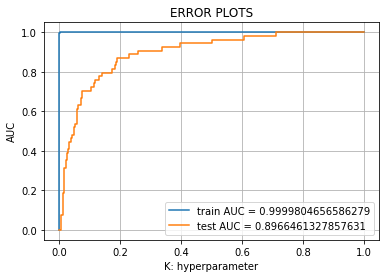

the maximum value of tpr*(1-fpr) 0.9988680099615124 for threshold 0.733
Model test Accuracy score is :  0.9131238447319778
Model test Recall score is :  0.35185185185185186
Model test Precision score is :  0.6129032258064516
Model test F1 score is :  0.44705882352941173
Model test AUC score is :  0.8966461327857631


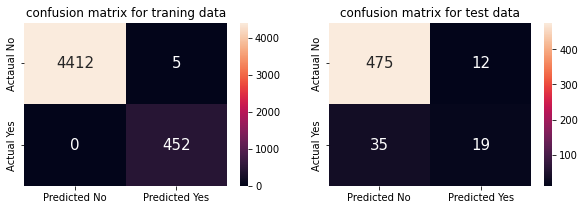

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train1,X_test1,y_train,y_test)

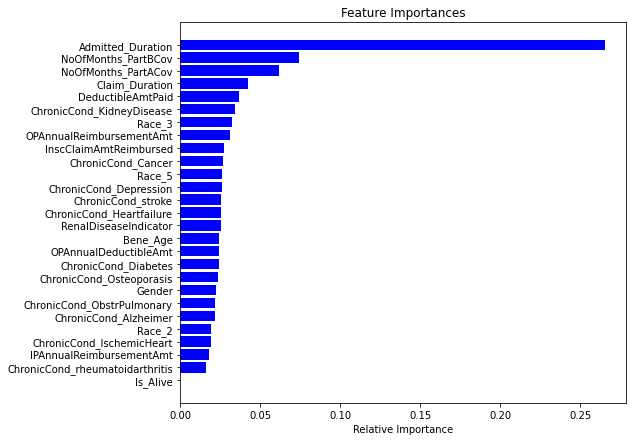

In [ ]:
features = X_train1.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()